## Regression between the wind influence and AMV



I attach the wind influence on sea level for two new methods.
NearestPointAverage is the average of zonal winds at the 6 tide gauges.
PressureDifference is using the pressure in the southern box minus northern box of Dangendorf.
This way both methods have only one regressor for the wind. It makes them very simple and while it increases the deviance it reduces the standard error in the computation of the trend.


What you can do with these time series is the same as what you did in your thesis:
Fig. 13 a, b
Fig. 16 b, d
One difference is that instead of removing the linear trend from these time series you could remove the 3rd order trend. I use Polynomial from Numpy to do that (see the .html file of the notebook "Extend wind time series backward" section)
I find that this brings the pressure and wind results closer.


My suggestion for the maps of Fig 16 would be to use the SST product that is best correlated to the wind influence.
I hope we find more consistent results than Fig 16 d.
The doughnuts type of pattern you found in Fig 16 b, d for Dangendorf is interesting. Maybe you find something similar now as well.
If that is the case you could define a new "doughnut index" which is the average SST in that region. If that doughnut index average temperate lags behind the AMV temperature, which it probably does, then the problem of lag between AMV and wind influence on sea level is solved!

In [1]:
# import necessary packages

import regionmask
import numpy as np
import xarray as xr
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tsa.tsatools
from shapely.geometry import Polygon


%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Documents/Wind effect/Thesis-KNMI/AMV/code')

import regression as regr
import figures as fig


## Import SST regression results and show regions

In [2]:
# Import regression results
results_hadisst_21 = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/regression results/results_hadisst_21.nc')
results_cobesst_21 = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/regression results/results_cobesst_21.nc')

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


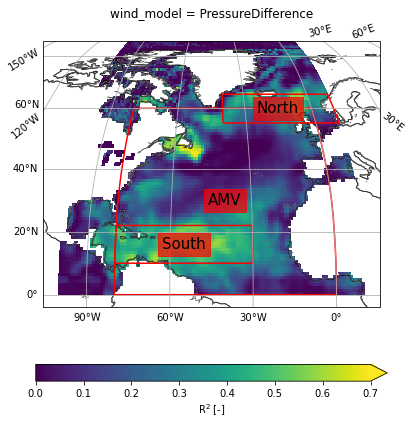

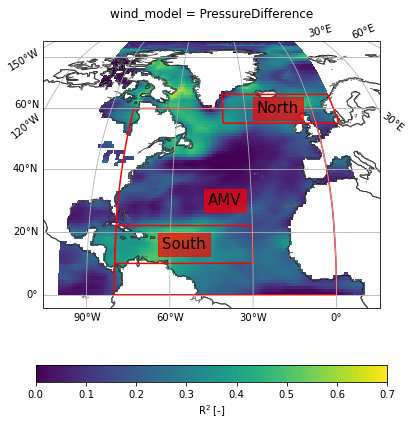

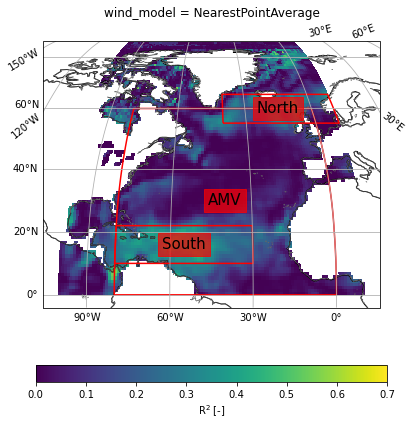

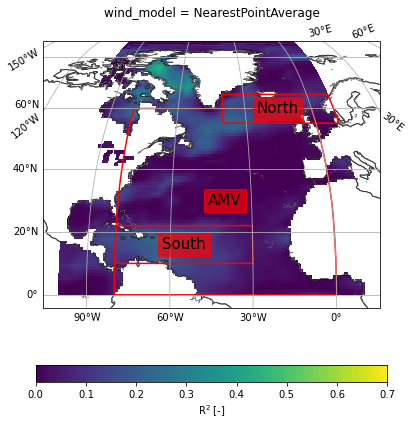

In [3]:
wind_models = ['NearestPointAverage', 'PressureDifference']
amv = np.array([[-80, 0], [-80, 60], [0, 60], [0, 0]])
north = np.array([[-40, 55], [-40, 65], [10, 65], [10, 55]])
south = np.array([[-80, 10], [-80, 22], [-30, 22], [-30, 10]])


plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_21.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([amv, north, south], 
                                           names=["AMV", "North", "South"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/SST_allregions_map_hadi_PD_21')





plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_21.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([amv, north, south], 
                                           names=["AMV", "North", "South"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)



plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/SST_allregions_map_cobe_PD_21')


plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_21.r2.sel(wind_model = wind_models[0]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([amv, north, south], 
                                           names=["AMV", "North", "South"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)




plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/SST_allregions_map_hadi_NP_21')





plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_21.r2.sel(wind_model = wind_models[0]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([amv, north, south], 
                                           names=["AMV", "North", "South"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)




plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/SST_allregions_map_cobe_NP_21')






#### Import and process the wind data

In [4]:
wind_data = pd.read_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/WindInfluenceSeaLevelDutchCoast.csv', index_col = 'time')


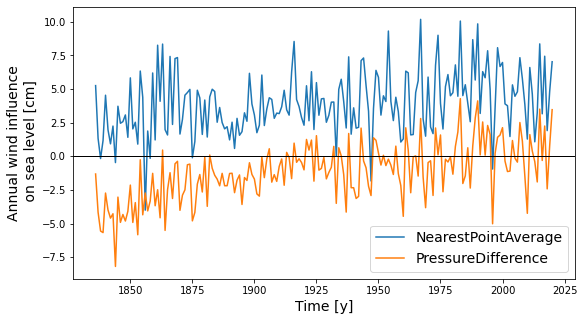

In [5]:
wind_data.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Annual wind influence\n on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.savefig(f'/Users/iriskeizer/Documents/Wind effect/Figures/AMV/timeseries_wind_raw', dpi = 500)

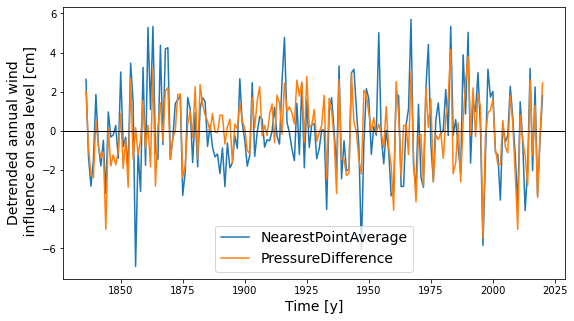

In [6]:
# Detrend the data using a first order polynomial
wind_data_dt = statsmodels.tsa.tsatools.detrend(wind_data, order=1, axis = 0)

wind_data_dt.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended annual wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  

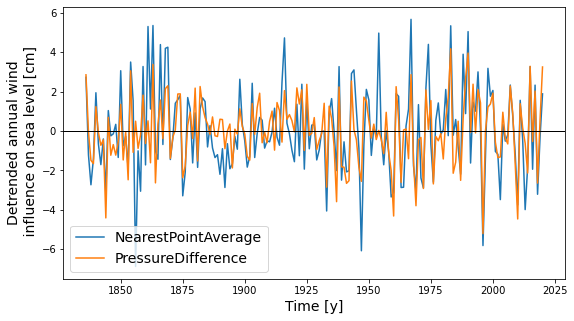

In [7]:
# Detrend the data using a second order polynomial
wind_data_dt = statsmodels.tsa.tsatools.detrend(wind_data, order=2, axis = 0)

wind_data_dt.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended annual wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  

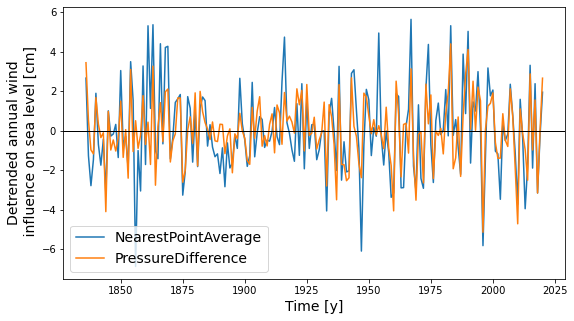

In [8]:
# Detrend the data using a third order polynomial
wind_data_dt = statsmodels.tsa.tsatools.detrend(wind_data, order=3, axis = 0)

wind_data_dt.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended annual wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)
plt.savefig(f'/Users/iriskeizer/Documents/Wind effect/Figures/AMV/timeseries_wind_detrended', dpi = 500)

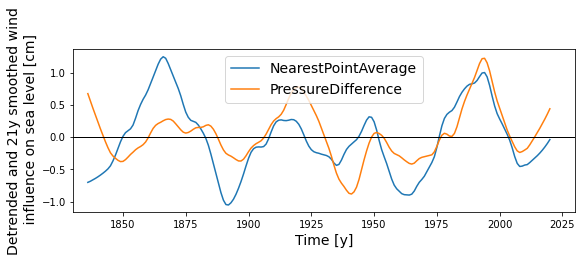

In [9]:
# Apply a LOWESS function with a 21-year smoothing window

def df_smooth(df, window):
    
    lowess = sm.nonparametric.lowess
    
    df_lo = df.copy()
    
    frac = window/(df.index.size)
    
    for column in df:
        df_lo[column] = lowess(df[column].values, df.index.values, frac, return_sorted=False)
        
        
    return df_lo


wind_data_dt_sm = df_smooth(wind_data_dt, 21)

wind_data_dt_sm.plot(figsize = (9,3))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 21y smoothed wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1) 
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/timeseries_wind_smoothed_detrended', bbox_inches='tight', dpi = 500)

In [10]:
wind_data_dt_sm.to_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/amv_dt_sm_21')

#### Import and process the AMV data


In [11]:
# Import raw SST data 
hadisst = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/hadisst_processed.nc')

In [12]:
hadisst.sst

<xarray.DataArray 'sst' (time: 152, lat: 90, lon: 110)>
[1504800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 0.5 1.5 2.5 3.5 4.5 5.5 ... 85.5 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -99.5 -98.5 -97.5 -96.5 -95.5 ... 5.5 6.5 7.5 8.5 9.5
  * time     (time) int64 1870 1871 1872 1873 1874 ... 2017 2018 2019 2020 2021

In [13]:
# Import raw SST data 
hadisst = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/hadisst_processed.nc')
cobesst = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/cobesst_processed.nc')

# Take weighted average over region 0°N to 60°N and 80°W to 0°E

hadisst_amv = hadisst.where((hadisst.lat < 60 ) & (hadisst.lon > -80) & (hadisst.lon < 0), drop = True)
cobesst_amv = cobesst.where((cobesst.lat < 60 ) & (cobesst.lon > -80) & (cobesst.lon < 0), drop = True)

weights_amv = np.cos(np.deg2rad(hadisst_amv.lat))

hadisst_amv_weighted =  hadisst_amv.weighted(weights_amv)
cobesst_amv_weighted =  cobesst_amv.weighted(weights_amv)

hadisst_amv = hadisst_amv_weighted.mean(dim = ['lat', 'lon'])
cobesst_amv = cobesst_amv_weighted.mean(dim = ['lat', 'lon'])


# Select data from 1870 till 2019
hadisst_amv = hadisst_amv.where(hadisst_amv.time <= 2019, drop = True)
cobesst_amv = cobesst_amv.where(cobesst_amv.time >= 1870, drop = True)


# Create dataframe
AMV_data = pd.DataFrame({'HadISSTv1.1' : hadisst_amv.sst, 'COBE-SST2' : cobesst_amv.sst}, index = cobesst_amv.time)

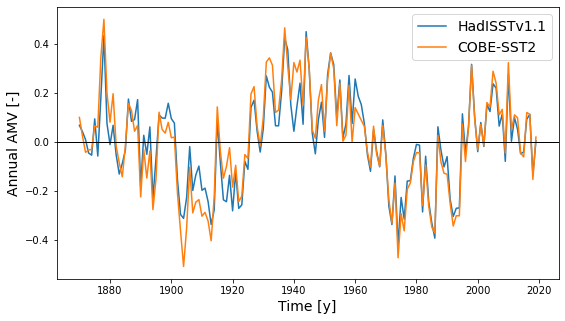

In [14]:
# Detrend the data using a third order polynomial
AMV_data_dt = statsmodels.tsa.tsatools.detrend(AMV_data, order=3, axis = 0)


AMV_data_dt.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  

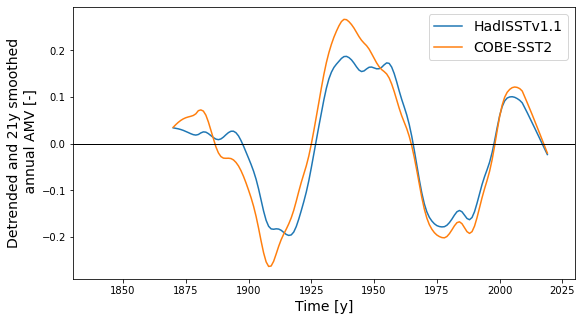

In [15]:
# Apply a LOWESS function with a 21-year smoothing window

AMV_data_dt_sm = df_smooth(AMV_data_dt, 21)

AMV_data_dt_sm.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 21y smoothed\n annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_detrended_amv', bbox_inches='tight', dpi = 500)

In [16]:
AMV_data_dt_sm.to_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/sst_amv_dt_sm_21')

### Perform regression

In [17]:
results_amv, timeseries_amv = regr.lagged_regression(AMV_data_dt_sm, wind_data_dt_sm)

In [18]:
results_amv

HadISSTv1.1                                          \
         NearestPointAverage                                           
                         -10       -9        -8        -7        -6    
result                                                                 
rmse                0.547586  0.554376  0.558599  0.559550  0.556748   
r$^2$               0.084943  0.055797  0.031329  0.013080  0.002400   
constant            0.013371  0.005583 -0.002802 -0.011650 -0.020926   
coef                0.166837  0.134765  0.100458  0.064417  0.027305   

                                                            ...  \
                                                            ...   
               -5        -4        -3        -2        -1   ...   
result                                                      ...   
rmse      0.549789  0.538724  0.524130  0.507187  0.489208  ...   
r$^2$     0.000339  0.007575  0.024301  0.050031  0.083437  ...   
constant -0.030640 -0.040633 -0.050605 -0.060118 -0.068763  ...   
coef     -0.010127 -0.047065 -0.082717 -0.116395 -0.147602  ...   

                  COBE-SST2                                                    \
         PressureDifference                                                     
                         16        17        18        19        20        21   
result                                                                          
rmse               0.386937  0.399247  0.411330  0.422859  0.433539  0.443163   
r$^2$              0.298596  0.258624  0.218943  0.180587  0.144372  0.110940   
constant           0.030140  0.028931  0.028591  0.029299  0.031162  0.034107   
coef              -0.244163 -0.227834 -0.210162 -0.191263 -0.171204 -0.150059   

                                                  
                                                  
                22        23        24        25  
result                                            
rmse      0.451644  0.458961  0.465020  0.469652  
r$^2$     0.080818  0.054600  0.032930  0.016418  
constant  0.037943  0.042375  0.047206  0.052345  
coef     -0.127919 -0.104947 -0.081333 -0.057303  

[4 rows x 144 columns]

In [19]:
results_amv.swaplevel(0,2, axis=1)[0]

,NearestPointAverage,PressureDifference,NearestPointAverage,PressureDifference
,HadISSTv1.1,HadISSTv1.1,COBE-SST2,COBE-SST2
result,,,,
rmse,0.470951,0.367810,0.486721,0.384549
r$^2$,0.122622,0.296661,0.062878,0.231186
constant,-0.076387,0.051487,-0.076387,0.051487
coef,-0.176062,-0.238875,-0.126075,-0.210873


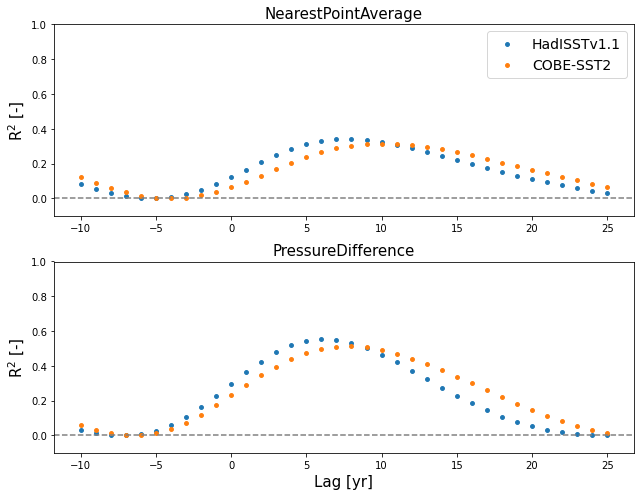

In [20]:
fig.plot_result_4(results_amv, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0)

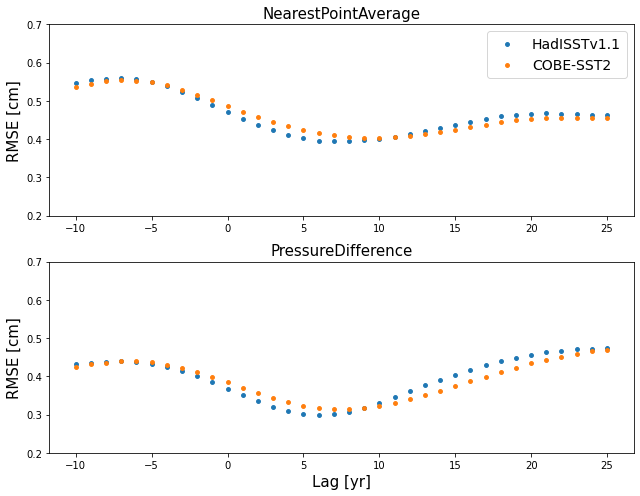

In [21]:
fig.plot_result_4(results_amv, 'rmse', 'RMSE [cm]', ymin = 0.2, ymax = 0.7)

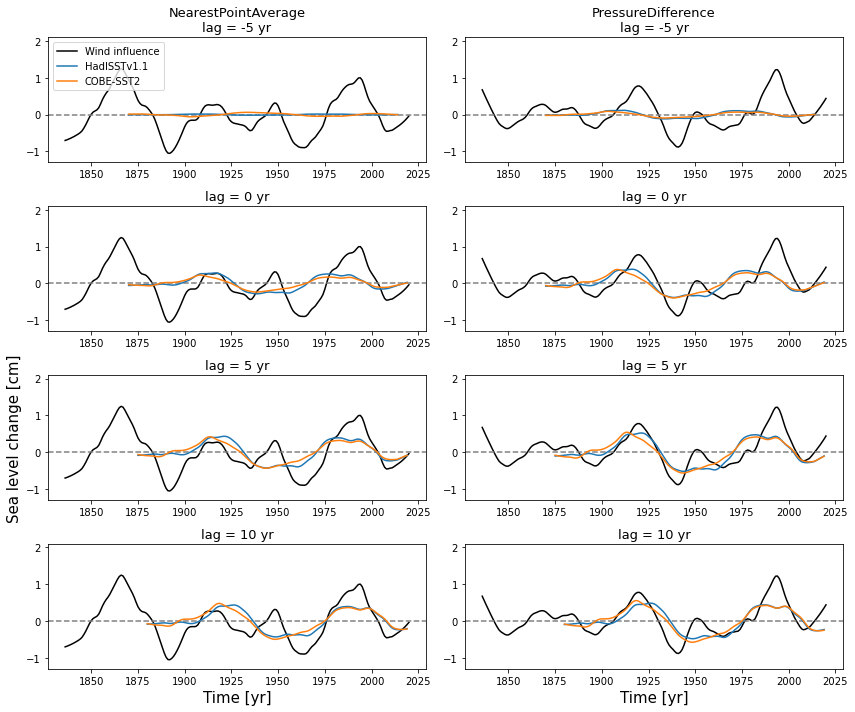

In [22]:
fig.plot_timeseries_2(timeseries_amv, wind_data_dt_sm, [-5, 0, 5, 10], ymin= -1.3, ymax = 2.1)

## Regression with SST of Northern area

#### Import and process the SST data


In [23]:
# Take weighted average over Northern region 55°N to 65°N and 40°W to 10°E 

hadisst_north = hadisst.where((hadisst.lat > 55 ) & (hadisst.lat < 65 ) & (hadisst.lon > -40) & (hadisst.lon < 10), drop = True)
cobesst_north = cobesst.where((cobesst.lat > 55 ) & (cobesst.lat < 65 ) & (cobesst.lon > -40) & (cobesst.lon < 10), drop = True)

weights_north = np.cos(np.deg2rad(hadisst_north.lat))

hadisst_north_weighted =  hadisst_north.weighted(weights_north)
cobesst_north_weighted =  cobesst_north.weighted(weights_north)

hadisst_north = hadisst_north_weighted.mean(dim = ['lat', 'lon'])
cobesst_north = cobesst_north_weighted.mean(dim = ['lat', 'lon'])

# Select data from 1870 till 2019
hadisst_north = hadisst_north.where(hadisst_north.time <= 2019, drop = True)
cobesst_north = cobesst_north.where(cobesst_north.time >= 1870, drop = True)


# Create dataframe
NORTH_data = pd.DataFrame({'HadISSTv1.1' : hadisst_north.sst, 'COBE-SST2' : cobesst_north.sst}, index = cobesst_north.time)

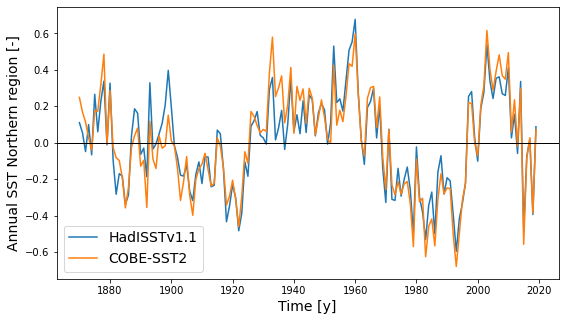

In [24]:
# Detrend the data using a third order polynomial
NORTH_data_dt = statsmodels.tsa.tsatools.detrend(NORTH_data, order=3, axis = 0)


NORTH_data_dt.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Annual SST Northern region [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  

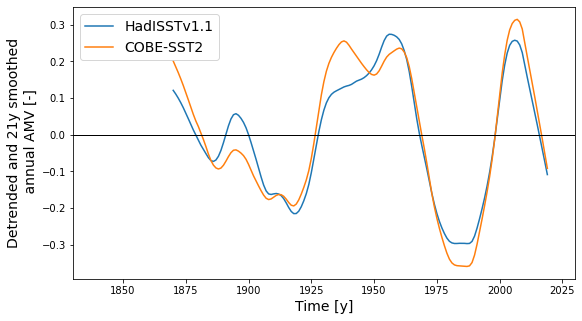

In [25]:
# Apply a LOWESS function with a 21-year smoothing window

NORTH_data_dt_sm = df_smooth(NORTH_data_dt, 21)

NORTH_data_dt_sm.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 21y smoothed\n annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_detrended_north', bbox_inches='tight', dpi = 500)

In [26]:
NORTH_data_dt_sm.to_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/sst_north_dt_sm_21')

### Perform regression

In [27]:
results_north, timeseries_north = regr.lagged_regression(NORTH_data_dt_sm, wind_data_dt_sm)

In [28]:
results_north

HadISSTv1.1                                          \
         NearestPointAverage                                           
                         -10       -9        -8        -7        -6    
result                                                                 
rmse                0.554069  0.560520  0.563715  0.562756  0.557057   
r$^2$               0.063146  0.034750  0.013504  0.001738  0.001291   
constant            0.013371  0.005583 -0.002802 -0.011650 -0.020926   
coef                0.143848  0.106354  0.065955  0.023481 -0.020027   

                                                            ...  \
                                                            ...   
               -5        -4        -3        -2        -1   ...   
result                                                      ...   
rmse      0.546201  0.530310  0.510129  0.487160  0.463208  ...   
r$^2$     0.013341  0.038330  0.075732  0.123572  0.178276  ...   
constant -0.030640 -0.040633 -0.050605 -0.060118 -0.068763  ...   
coef     -0.063514 -0.105874 -0.146023 -0.182926 -0.215754  ...   

                  COBE-SST2                                                    \
         PressureDifference                                                     
                         16        17        18        19        20        21   
result                                                                          
rmse               0.425707  0.435436  0.444245  0.452049  0.458692  0.464039   
r$^2$              0.150995  0.118135  0.088938  0.063554  0.042206  0.025205   
constant           0.027156  0.026404  0.026856  0.028673  0.031871  0.036222   
coef              -0.181933 -0.162448 -0.142095 -0.120840 -0.098812 -0.076426   

                                                  
                                                  
                22        23        24        25  
result                                            
rmse      0.468074  0.470920  0.472707  0.473510  
r$^2$     0.012726  0.004693  0.000692  0.000193  
constant  0.041350  0.046811  0.052352  0.057911  
coef     -0.054250 -0.032882 -0.012604  0.006641  

[4 rows x 144 columns]

In [29]:
results_north.swaplevel(0,2, axis=1)[0]

,NearestPointAverage,PressureDifference,NearestPointAverage,PressureDifference
,HadISSTv1.1,HadISSTv1.1,COBE-SST2,COBE-SST2
result,,,,
rmse,0.439568,0.355916,0.457831,0.360280
r$^2$,0.235658,0.341413,0.170826,0.325163
constant,-0.076387,0.051487,-0.076387,0.051487
coef,-0.244075,-0.256260,-0.207806,-0.250087


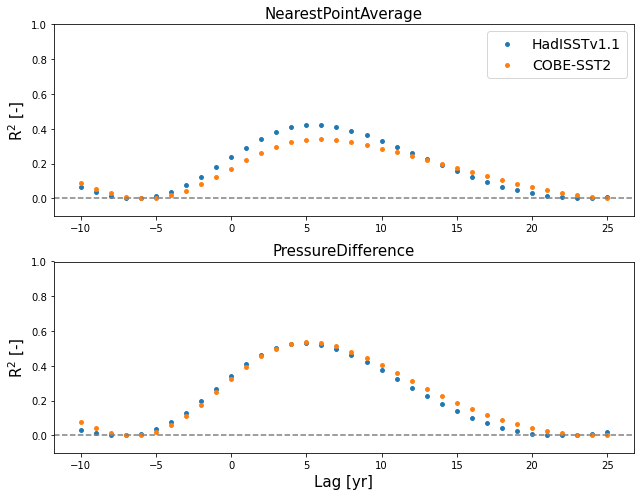

In [30]:
fig.plot_result_4(results_north, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0)

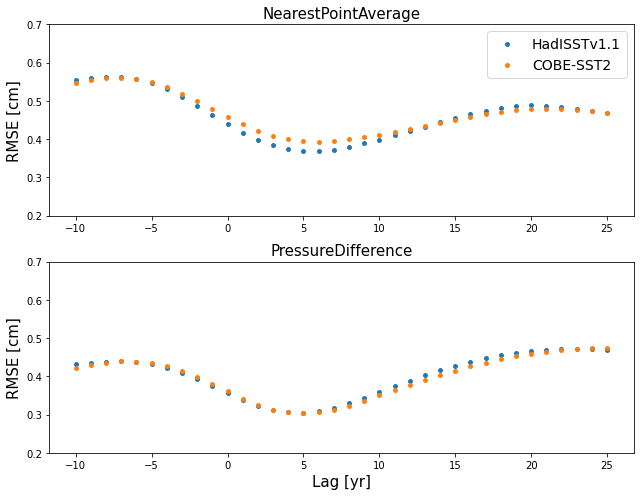

In [31]:
fig.plot_result_4(results_north, 'rmse', 'RMSE [cm]', ymin = 0.2, ymax = 0.7)

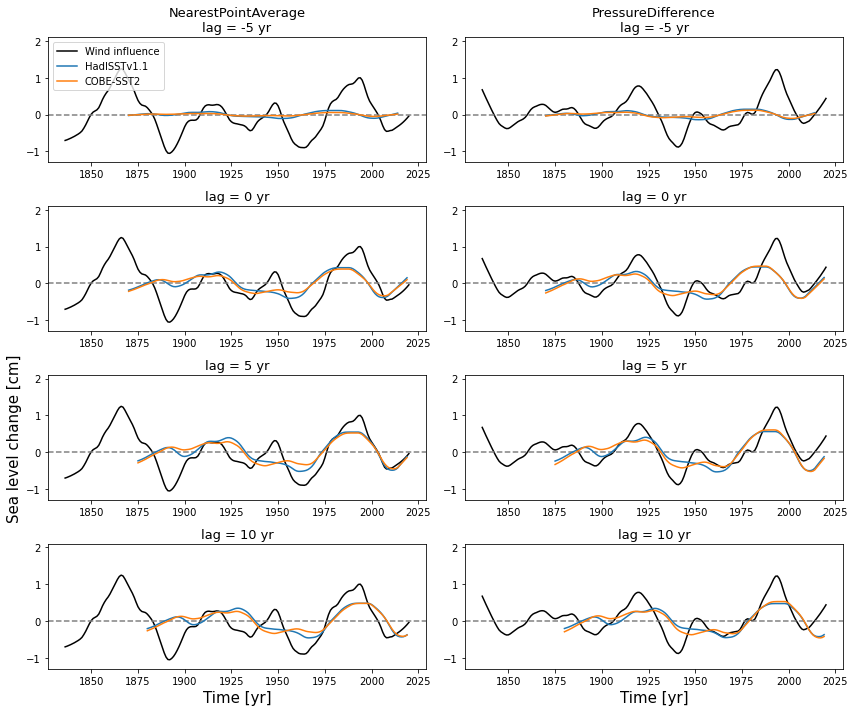

In [32]:
fig.plot_timeseries_2(timeseries_north, wind_data_dt_sm, [-5, 0, 5, 10], ymin= -1.3, ymax = 2.1)

## Regression with SST of Southern area

In [33]:
# Take weighted average over Northern region 55°N to 65°N and 40°W to 10°E 

hadisst_south = hadisst.where((hadisst.lat > 10 ) & (hadisst.lat < 22 ) & (hadisst.lon > -80) & (hadisst.lon < -30), drop = True)
cobesst_south = cobesst.where((cobesst.lat > 10 ) & (cobesst.lat < 22 ) & (cobesst.lon > -80) & (cobesst.lon < -30), drop = True)

weights_south = np.cos(np.deg2rad(hadisst_south.lat))

hadisst_south_weighted =  hadisst_south.weighted(weights_south)
cobesst_south_weighted =  cobesst_south.weighted(weights_south)

hadisst_south = hadisst_south_weighted.mean(dim = ['lat', 'lon'])
cobesst_south = cobesst_south_weighted.mean(dim = ['lat', 'lon'])

# Select data from 1870 till 2019
hadisst_south = hadisst_south.where(hadisst_south.time <= 2019, drop = True)
cobesst_south = cobesst_south.where(cobesst_south.time >= 1870, drop = True)


# Create dataframe
SOUTH_data = pd.DataFrame({'HadISSTv1.1' : hadisst_south.sst, 'COBE-SST2' : cobesst_south.sst}, index = cobesst_south.time)

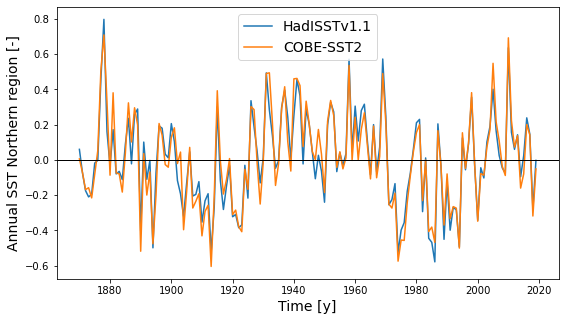

In [34]:
# Detrend the data using a third order polynomial
SOUTH_data_dt = statsmodels.tsa.tsatools.detrend(SOUTH_data, order=3, axis = 0)


SOUTH_data_dt.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Annual SST Northern region [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  

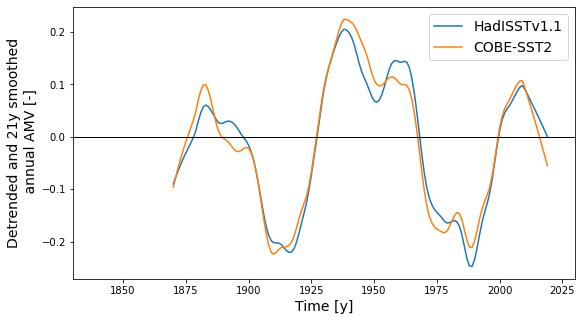

In [35]:
# Apply a LOWESS function with a 21-year smoothing window

SOUTH_data_dt_sm = df_smooth(SOUTH_data_dt, 21)

SOUTH_data_dt_sm.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 21y smoothed\n annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_detrended_south', bbox_inches='tight', dpi = 500)

In [36]:
SOUTH_data_dt_sm.to_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/sst_south_dt_sm_21')

### Perform regression

In [37]:
results_south, timeseries_south = regr.lagged_regression(SOUTH_data_dt_sm, wind_data_dt_sm)

In [38]:
results_south

HadISSTv1.1                                          \
         NearestPointAverage                                           
                         -10       -9        -8        -7        -6    
result                                                                 
rmse                0.569094  0.570325  0.566682  0.557969  0.544292   
r$^2$               0.011648  0.000687  0.003092  0.018650  0.046537   
constant            0.013371  0.005583 -0.002802 -0.011650 -0.020926   
coef                0.061781  0.014957 -0.031560 -0.076919 -0.120248   

                                                            ...  \
                                                            ...   
               -5        -4        -3        -2        -1   ...   
result                                                      ...   
rmse      0.525902  0.503540  0.478495  0.452662  0.428025  ...   
r$^2$     0.085315  0.132971  0.186809  0.243306  0.298363  ...   
constant -0.030640 -0.040633 -0.050605 -0.060118 -0.068763  ...   
coef     -0.160614 -0.197195 -0.229340 -0.256679 -0.279116  ...   

                  COBE-SST2                                                    \
         PressureDifference                                                     
                         16        17        18        19        20        21   
result                                                                          
rmse               0.424356  0.435960  0.446039  0.454430  0.461082  0.466085   
r$^2$              0.156373  0.116008  0.081565  0.053665  0.032200  0.016589   
constant           0.033990  0.033864  0.034582  0.036217  0.038786  0.042158   
coef              -0.177175 -0.152870 -0.128383 -0.104257 -0.080786 -0.057946   

                                                  
                                                  
                22        23        24        25  
result                                            
rmse      0.469608  0.471824  0.472777  0.472440  
r$^2$     0.006245  0.000868  0.000399  0.004705  
constant  0.046113  0.050351  0.054687  0.059050  
coef     -0.035500 -0.013211  0.008939  0.030671  

[4 rows x 144 columns]

In [39]:
results_south.swaplevel(0,2, axis=1)[0]

,NearestPointAverage,PressureDifference,NearestPointAverage,PressureDifference
,HadISSTv1.1,HadISSTv1.1,COBE-SST2,COBE-SST2
result,,,,
rmse,0.405924,0.306652,0.450321,0.335901
r$^2$,0.348185,0.511111,0.197805,0.413400
constant,-0.076387,0.051487,-0.076387,0.051487
coef,-0.296679,-0.313544,-0.223615,-0.281985


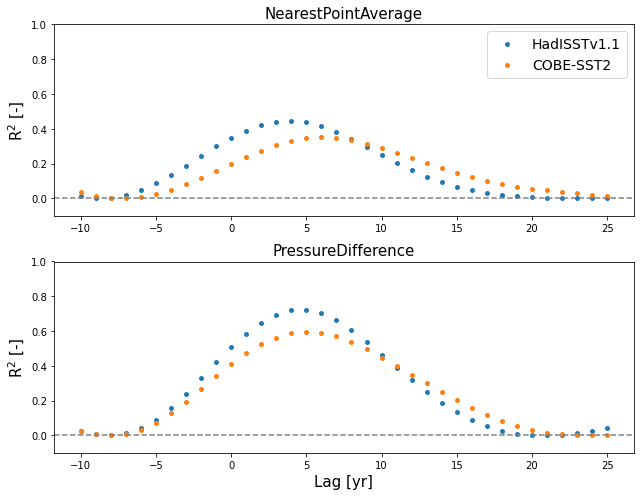

In [40]:
fig.plot_result_4(results_south, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0)

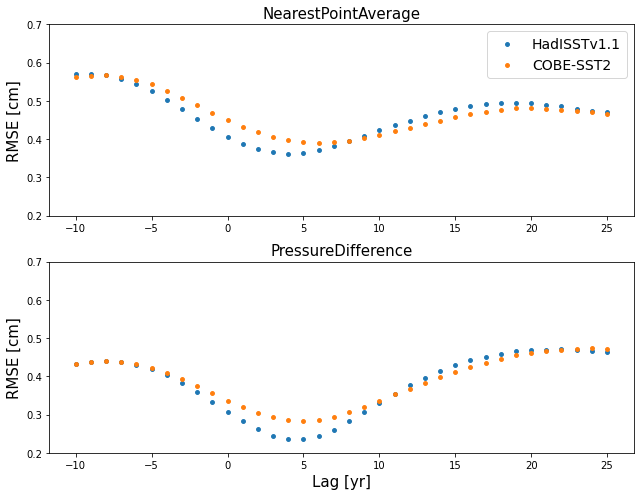

In [41]:
fig.plot_result_4(results_south, 'rmse', 'RMSE [cm]', ymin = 0.2, ymax = 0.7)

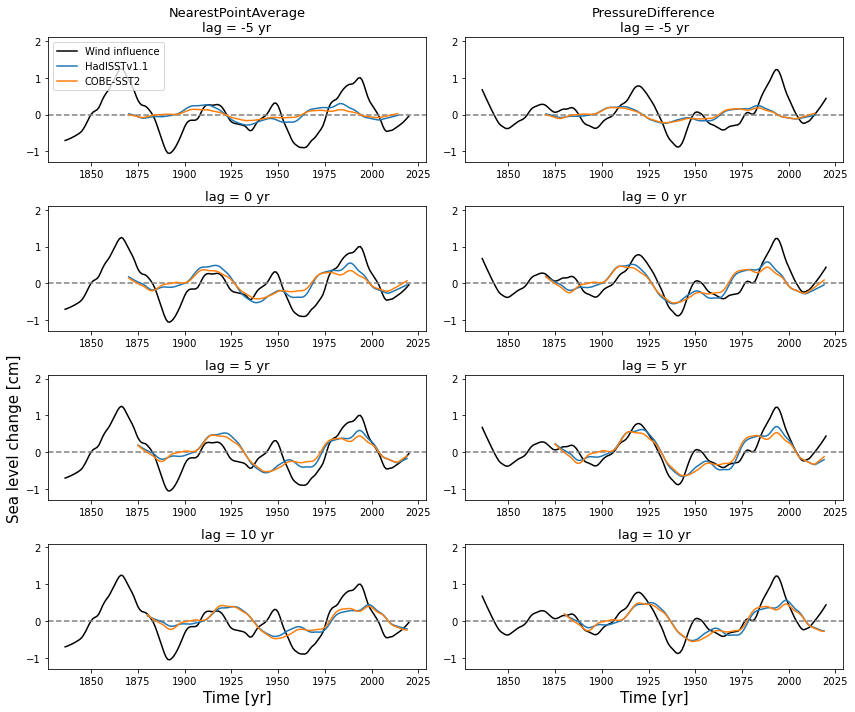

In [42]:
fig.plot_timeseries_2(timeseries_south, wind_data_dt_sm, [-5, 0, 5, 10], ymin= -1.3, ymax = 2.1)

## Compare results of different regions

In [43]:
def plot_result_4(results, var, ylabel, ymin = -0.01, ymax = 0.15, window = 21, location = 'upper right'):
    '''
    Function to plot a result of the regression between atmospheric contribution to sea-level and the AMV
    
    '''
    labels_wind = ['NearestPointAverage', 'PressureDifference']
    labels_AMV = ['HadISSTv1.1', 'COBE-SST2']
    
    fsize = 15
    
    fig, axs = plt.subplots(2, 1, figsize = (9,7))
    
    for i, l in enumerate(labels_wind):
        
        ax = axs[i]
        
        data = results.swaplevel(0,1, axis=1)[l]
        
        for k in labels_AMV:
            dataT = data[k].T
            ax.scatter(dataT.index, dataT[var].values, s = 15)
        
        if i == 1:
            ax.set_xlabel('Lag [yr]', fontsize=fsize)
        
        ax.set_ylabel(ylabel, fontsize=fsize)
        
        ax.set_title(labels_wind[i], fontsize=fsize)
        ax.set_ylim(ymin, ymax)
        
        if i == 0:
            ax.legend(labels = labels_AMV, loc = location, fontsize = 14)   
        
        ax.axhline(color='grey', linestyle='--')  
        
    plt.savefig(f'/Users/iriskeizer/Documents/Wind effect/Figures/AMV/results_{var}_{window}', bbox_inches='tight', dpi = 500)
        
            
    plt.tight_layout()
    
    if var == 'r$^2$':
        var = 'r2'
    
    plt.savefig(f'/Users/iriskeizer/Documents/Wind effect/Figures/AMV/results2_{var}_{window}', dpi = 500)   
    

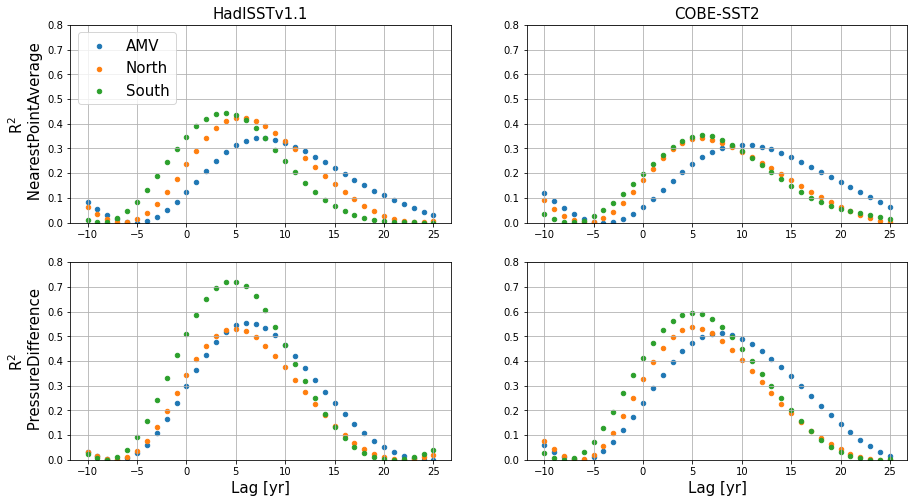

In [46]:
labels_wind = ['NearestPointAverage', 'PressureDifference']
labels_AMV = ['HadISSTv1.1', 'COBE-SST2']
var = 'r$^2$'
s = 20

fig, axs = plt.subplots(2, 2, figsize = (15,8))

for i, l in enumerate(labels_wind):
    
    ax = axs[i,0]
    
    data_amv = results_amv.swaplevel(0,1, axis=1)[l]
    data_north = results_north.swaplevel(0,1, axis=1)[l]
    data_south = results_south.swaplevel(0,1, axis=1)[l]
    
    dataT_amv = data_amv[labels_AMV[0]].T
    dataT_north = data_north[labels_AMV[0]].T
    dataT_south = data_south[labels_AMV[0]].T
        
    ax.scatter(dataT_amv.index, dataT_amv[var].values, s = s)
    ax.scatter(dataT_north.index, dataT_north[var].values, s = s)
    ax.scatter(dataT_south.index, dataT_south[var].values, s = s)
    ax.grid() 
    
    if i == 1:
        ax.set_xlabel('Lag [yr]', fontsize=15)
        
    ax.set_ylabel(f'R$^2$ \n {labels_wind[i]}', fontsize=15)   
    if i == 0:
        ax.set_title(labels_AMV[0], fontsize=15)
        ax.legend(labels = ['AMV', 'North', 'South'],loc = 'upper left', fontsize =  15)
    ax.set_ylim(0.0, 0.8) 
    #ax.set_xticklabels(dataT_south.index, Fontsize = 15)
    
    
    ax = axs[i,1]
    
    data_amv = results_amv.swaplevel(0,1, axis=1)[l]
    data_north = results_north.swaplevel(0,1, axis=1)[l]
    data_south = results_south.swaplevel(0,1, axis=1)[l]
    
    dataT_amv = data_amv[labels_AMV[1]].T
    dataT_north = data_north[labels_AMV[1]].T
    dataT_south = data_south[labels_AMV[1]].T
        
    ax.scatter(dataT_amv.index, dataT_amv[var].values, s = s)
    ax.scatter(dataT_north.index, dataT_north[var].values, s = s)
    ax.scatter(dataT_south.index, dataT_south[var].values, s = s)
    ax.grid() 
        
    if i == 1:
        ax.set_xlabel('Lag [yr]', fontsize=15)
    if i == 0:
        ax.set_title(labels_AMV[1], fontsize=15)
    ax.set_ylim(0.0, 0.8) 
    #ax.set_xticklabels(dataT_south.index, Fontsize = 15)
    
    plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/SST_allregions_r2_21')



   